In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

In [6]:
train_json_path = '/opt/ml/dataset/train.json'
LABEL_NAME = ["General trash", "Paper", "Paper pack", "Metal", 
              "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

In [7]:
coco = COCO(train_json_path)

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


index:  1059
n_objects:  7


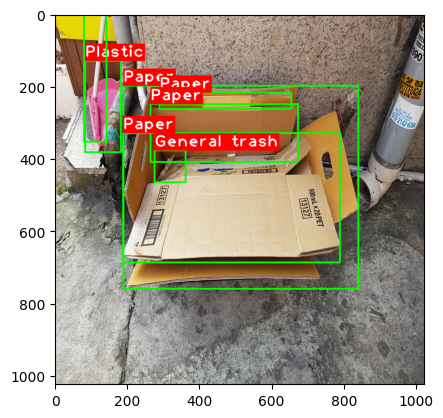

In [8]:
img_idx = np.random.randint(0, len(coco.imgs))
print('index: ', img_idx)

image_info = coco.loadImgs(img_idx)[0]

image_path = os.path.join('/opt/ml/dataset', image_info['file_name'])
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

annot_ids = coco.getAnnIds(imgIds=image_info['id'])
annot_info_list = coco.loadAnns(annot_ids)


print('n_objects: ', len(annot_info_list))

for annot in annot_info_list:
    cat = LABEL_NAME[annot['category_id']]

    x1 = int(annot['bbox'][0])
    y1 = int(annot['bbox'][1])
    x2 = int(annot['bbox'][0] + annot['bbox'][2])
    y2 = int(annot['bbox'][1] + annot['bbox'][3])

    iamge = cv2.rectangle(
        image, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=3
    )

    (w, h), _ = cv2.getTextSize(cat, cv2.FONT_HERSHEY_PLAIN, 3, 3)
    image = cv2.rectangle(
        image, (x1, int(y1-1.6*h)), (x1+w, y1), (255, 0, 0), -1
    )
    cv2.putText(
        iamge, cat, (x1, y1-10), cv2.FONT_HERSHEY_PLAIN, 3, (255, 255, 255), 3
    )

plt.imshow(image)
plt.show()

In [6]:
import bbox_visualizer as bbv

index:  1351
n_objects:  6


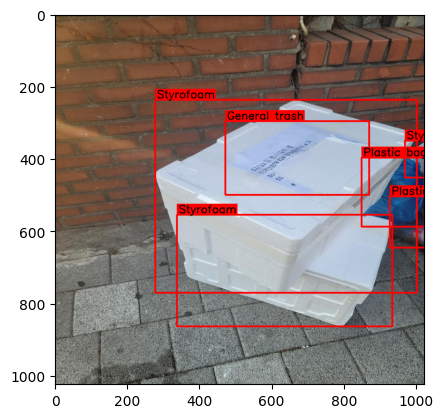

In [107]:
img_idx = np.random.randint(0, len(coco.imgs))
print('index: ', img_idx)

image_info = coco.loadImgs(img_idx)[0]

image_path = os.path.join('/opt/ml/dataset', image_info['file_name'])
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

annot_ids = coco.getAnnIds(imgIds=image_info['id'])
annot_info_list = coco.loadAnns(annot_ids)

print('n_objects: ', len(annot_info_list))

labels, bboxes = [], []
for annot in annot_info_list:
    label = LABEL_NAME[annot['category_id']]

    x1 = int(annot['bbox'][0])
    y1 = int(annot['bbox'][1])
    x2 = int(annot['bbox'][0] + annot['bbox'][2])
    y2 = int(annot['bbox'][1] + annot['bbox'][3])

    labels.append(label)
    bboxes.append([x1, y1, x2, y2])

image = bbv.bbox_visualizer.draw_multiple_rectangles(
    image, bboxes, bbox_color=(255, 0, 0)
)
iamge = bbv.bbox_visualizer.add_multiple_labels(
    image, labels, bboxes, text_bg_color=(255, 0, 0)
)

plt.imshow(image)
plt.show()